In [2498]:
# %pip install scikit-learn
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn

In [2499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2500]:
### Loading the Dataset
data = pd.read_csv("House_Rent_Dataset.csv")
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [2501]:
# data = pd.read_csv("House_Rent_Dataset.csv")
# data = data[['Rent', 'City']]
# x = data['City']
# y = data['Rent']
# plt.scatter(x, y)


In [2502]:
data['Area Locality'].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'BN Reddy Nagar', 'Godavari Homes, Quthbullapur',
       'Manikonda, Hyderabad'], dtype=object)

In [2503]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [2504]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [2505]:
def replace_ground_basement(row):
    if 'Ground' in row:
        return row.replace("Ground", '1')
    elif "Upper Basement" in row:
        return row.replace("Upper Basement", '2')
    elif "Lower Basement" in row:
        return row.replace("Lower Basement", '1')
    else:
        return row
    
def replace_out_of(row):
    if " out of " not in row:
        return '1'
    else:
        return row.replace(" out of ", '/')

def evaluate_fraction(row):
    try:
        return eval(row)
    except ZeroDivisionError:
        return None
    
def check_greater_left_value(row):
    if " out of " in row:
        test = row.split(" out of ")
        if int(test[0]) > int(test[1]):
            print(test)
            row = "{} out of {}".format(test[1], test[0])
            return row
        else:
            return row
    else:
        return row

def check_gereater_than_1(row):
    if row > 1:
        print(row)
    return row

In [2506]:
data['Floor'] = data['Floor'].apply(replace_ground_basement)

In [2507]:
data['Floor'] = data['Floor'].apply(check_greater_left_value)

['8', '5']
['2', '1']


In [2508]:
data['Floor'] = data['Floor'].apply(replace_out_of)

In [2509]:
data['Floor'] = data['Floor'].apply(evaluate_fraction)

In [2510]:
data['Floor'] = data['Floor'].apply(check_gereater_than_1)

In [2511]:
data['Floor'].unique()

array([0.5       , 0.33333333, 1.        , 0.25      , 0.66666667,
       0.8       , 0.4       , 0.28571429, 0.875     , 0.75      ,
       0.2       , 0.625     , 0.16666667, 0.6       , 0.57894737,
       0.78571429, 0.7       , 0.15384615, 0.85714286, 0.57142857,
       0.55128205, 0.72222222, 0.41666667, 0.42857143, 0.5483871 ,
       0.52380952, 0.36842105, 0.60869565, 0.45      , 0.22222222,
       0.79166667, 0.14285714, 0.04545455, 0.06896552, 0.125     ,
       0.90909091, 0.70833333, 0.35714286, 0.35      , 0.71428571,
       0.40909091, 0.59090909, 0.5952381 , 0.6097561 , 0.67948718,
       0.65      , 0.69565217, 0.55555556, 0.76190476, 0.3125    ,
       0.7804878 , 0.1       , 0.61904762, 0.31034483, 0.52808989,
       0.17073171, 0.93333333, 0.86666667, 0.26315789, 0.27272727,
       0.4047619 , 0.83333333, 0.63636364, 0.52941176, 0.26666667,
       0.46666667, 0.05      , 0.27777778, 0.5862069 , 0.63157895,
       0.375     , 0.77272727, 0.53333333, 0.48387097, 0.39285

<BarContainer object of 268 artists>

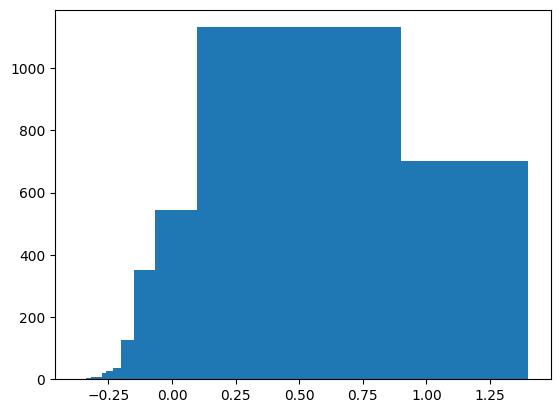

In [2512]:
plt.bar(data['Floor'].value_counts().index, data['Floor'].value_counts().values)

In [2513]:
data['Area Locality'].unique()[0:50]

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       'Dumdum Park', 'South Dum Dum', 'Thakurpukur', 'Malancha',
       'Palm Avenue Kolkata, Ballygunge', 'Natunhat',
       'Action Area 1, Rajarhat Newtown', 'Keshtopur',
       'Tarulia, Keshtopur', 'Dum Dum Metro', 'Paschim Barisha',
       'New Town Action Area 1', 'Barasat', 'Behala', 'Behala Chowrasta',
       'Santoshpur', 'Garia Station, Garia', 'Joka', 'Sreebhumi',
       'Rajarhat', 'Dum Dum', 'Kodalia, Hooghly-Chinsurah', 'Baguiati',
       'Rabindra Sarobar Area, Dhakuria', 'Baghajatin',
       'Project Kaikhali, Vip Road', 'Vip Road', 'Baruipur',
       'Shyam Bazar', 'Birati', 'Bansdroni', 'Jadavpur University',
       'Bhadrakali', 'Ballygunge', 'Kalikapur',
       'Baishnabghata Patuli Township, Patuli', 'Salt Lake City',
       'New Town', 'Pancha Sayar', 'Hooghly-Chinsurah',
       'Amtala, Diamond Harbour Road', 'Shrachi Village, Madhyam Gram',
       'Kasba', 'VIP Road Haldiram', 'Sarsuna', '

In [2514]:
# plt.bar(data['Area Locality'].value_counts().index, data['Area Locality'].value_counts().values)

<BarContainer object of 6 artists>

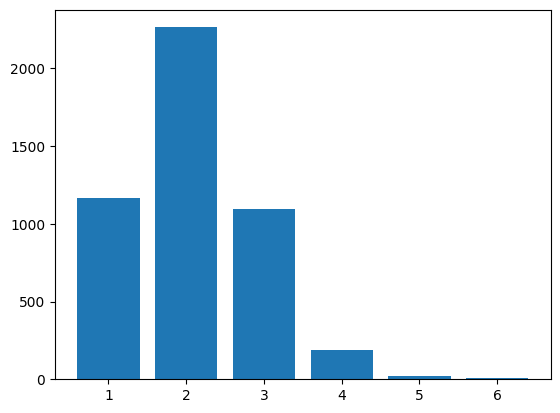

In [2515]:
plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_24652\1622857777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rent'])


<Axes: xlabel='Rent', ylabel='Density'>

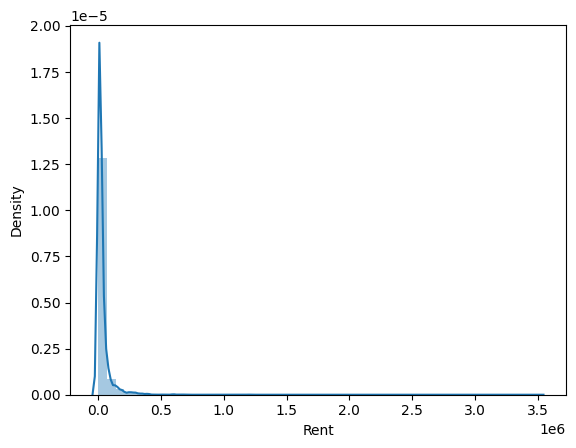

In [2516]:
sns.distplot(data['Rent'])

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_24652\1729628872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'])


<Axes: xlabel='Size', ylabel='Density'>

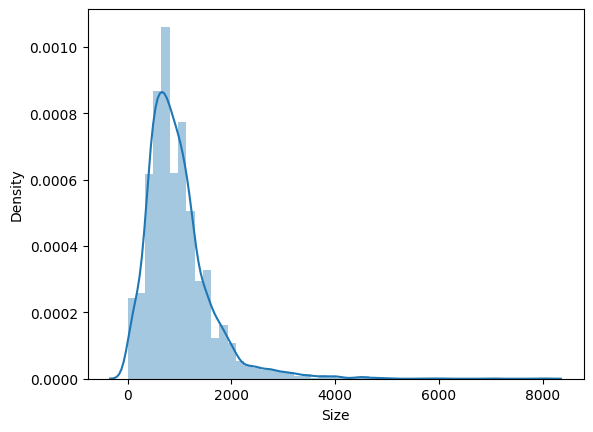

In [2517]:
sns.distplot(data['Size'])

In [2518]:
data['Floor']

0       0.500000
1       0.333333
2       0.333333
3       0.500000
4       0.500000
          ...   
4741    0.600000
4742    0.250000
4743    0.600000
4744    0.676471
4745    0.800000
Name: Floor, Length: 4746, dtype: float64

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_24652\1297725612.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Floor'])


<Axes: xlabel='Floor', ylabel='Density'>

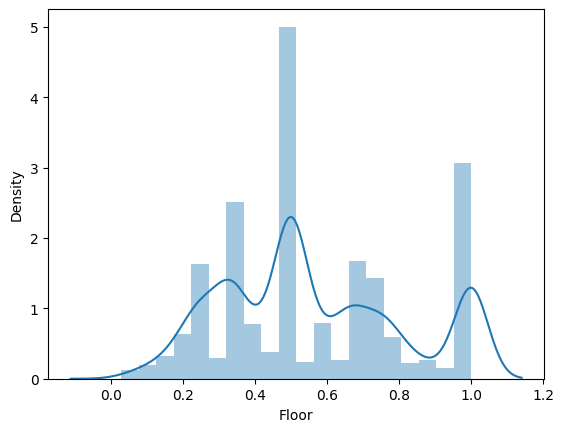

In [2519]:
# data['Floor'].value_counts()
sns.distplot(data['Floor'])

In [2520]:
data['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

In [2521]:
data['Area Locality'].value_counts()

Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: count, Length: 2235, dtype: int64

In [2522]:
data = data[['BHK', 
             'Bathroom', 
             'Furnishing Status', 
             'Area Type', 
             'City', 
             'Size', 
             'Floor', 
            #  'Tenant Preferred', 
            #  'Point of Contact', 
            #  'Area Locality', 
             'Rent']]

In [2523]:
def one_hot_encode(data, column, suffix=''):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded, lsuffix='_data', rsuffix='_encoded')
    # data = data.join(encoded)
    return data

In [2524]:
data = one_hot_encode(data, 'Furnishing Status')
data

,BHK,Bathroom,Area Type,City,Size,Floor,Rent,Semi-Furnished,Unfurnished
0,2,2,Super Area,Kolkata,1100,0.500000,10000,False,True
1,2,1,Super Area,Kolkata,800,0.333333,20000,True,False
2,2,1,Super Area,Kolkata,1000,0.333333,17000,True,False
3,2,1,Super Area,Kolkata,800,0.500000,10000,False,True
4,2,1,Carpet Area,Kolkata,850,0.500000,7500,False,True
...,...,...,...,...,...,...,...,...,...
4741,2,2,Carpet Area,Hyderabad,1000,0.600000,15000,True,False
4742,3,3,Super Area,Hyderabad,2000,0.250000,29000,True,False
4743,3,3,Carpet Area,Hyderabad,1750,0.600000,35000,True,False
4744,3,2,Carpet Area,Hyderabad,1500,0.676471,45000,True,False


In [2525]:
data = one_hot_encode(data, 'Area Type')
data

,BHK,Bathroom,City,Size,Floor,Rent,Semi-Furnished,Unfurnished,Carpet Area,Super Area
0,2,2,Kolkata,1100,0.500000,10000,False,True,False,True
1,2,1,Kolkata,800,0.333333,20000,True,False,False,True
2,2,1,Kolkata,1000,0.333333,17000,True,False,False,True
3,2,1,Kolkata,800,0.500000,10000,False,True,False,True
4,2,1,Kolkata,850,0.500000,7500,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
4741,2,2,Hyderabad,1000,0.600000,15000,True,False,True,False
4742,3,3,Hyderabad,2000,0.250000,29000,True,False,False,True
4743,3,3,Hyderabad,1750,0.600000,35000,True,False,True,False
4744,3,2,Hyderabad,1500,0.676471,45000,True,False,True,False


In [2526]:
data = one_hot_encode(data, 'City')
data

,BHK,Bathroom,Size,Floor,Rent,Semi-Furnished,Unfurnished,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,2,2,1100,0.500000,10000,False,True,False,True,False,False,False,True,False
1,2,1,800,0.333333,20000,True,False,False,True,False,False,False,True,False
2,2,1,1000,0.333333,17000,True,False,False,True,False,False,False,True,False
3,2,1,800,0.500000,10000,False,True,False,True,False,False,False,True,False
4,2,1,850,0.500000,7500,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,2,1000,0.600000,15000,True,False,True,False,False,False,True,False,False
4742,3,3,2000,0.250000,29000,True,False,False,True,False,False,True,False,False
4743,3,3,1750,0.600000,35000,True,False,True,False,False,False,True,False,False
4744,3,2,1500,0.676471,45000,True,False,True,False,False,False,True,False,False


In [2527]:
# data = one_hot_encode(data, 'Tenant Preferred')
# data

In [2528]:
# data = one_hot_encode(data, 'Point of Contact')
# data['Point of Contact'] = data['Point of Contact'].astype('category')
# data['Point of Contact'] = data['Point of Contact'].cat.codes
data

,BHK,Bathroom,Size,Floor,Rent,Semi-Furnished,Unfurnished,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,2,2,1100,0.500000,10000,False,True,False,True,False,False,False,True,False
1,2,1,800,0.333333,20000,True,False,False,True,False,False,False,True,False
2,2,1,1000,0.333333,17000,True,False,False,True,False,False,False,True,False
3,2,1,800,0.500000,10000,False,True,False,True,False,False,False,True,False
4,2,1,850,0.500000,7500,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,2,1000,0.600000,15000,True,False,True,False,False,False,True,False,False
4742,3,3,2000,0.250000,29000,True,False,False,True,False,False,True,False,False
4743,3,3,1750,0.600000,35000,True,False,True,False,False,False,True,False,False
4744,3,2,1500,0.676471,45000,True,False,True,False,False,False,True,False,False


In [2529]:
# data = one_hot_encode(data, 'Area Locality')
# data
# Encountered error in Area Locality tried a way to make on_hot_encoding work but it made the result lower therefore I opt not to use this feature

In [2530]:
# from scipy import stats

# def remove_outliers_zscore(df, threshold=3):
#     z_scores = stats.zscore(df)
#     abs_z_scores = abs(z_scores)
#     outliers = (abs_z_scores > threshold).all(axis=1)
#     df_no_outliers = df[~outliers]
#     return df_no_outliers

# # Remove outliers
# df_no_outliers = remove_outliers_zscore(data)

# from scipy import stats
# z = np.abs(stats.zscore(data['Rent']))
# threshold_z = 2
# print("Original DataFrame Shape:", data.shape)
# outlier_indices = np.where(z > threshold_z)[0]
# data = data.drop(outlier_indices)

# print("DataFrame Shape after Removing Outliers:", data.shape)

In [2531]:
Q1 = data['Rent'].quantile(0.40)
Q3 = data['Rent'].quantile(0.60)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(data['Rent']>=upper)[0]
lower_array = np.where(data['Rent']<=lower)[0]

data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

In [2532]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

In [2533]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [2534]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2535]:
from sklearn import linear_model
from sklearn.linear_model import RidgeCV

# Specify a range of alpha values to test
alphas = [30, 20, 10, 15, 25, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 175, 200, 225, 250, 275, 300, 400, 500]

# Create RidgeCV model with the specified alphas
model = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the model to your data
model.fit(X_train, y_train)

# Get the optimal alpha value
optimal_alpha = model.alpha_
print(optimal_alpha)

# model = linear_model.LinearRegression()
model = linear_model.Ridge(alpha=optimal_alpha)
model.fit(X_train, y_train)
model.coef_

20


array([ 1101.49087697,  1160.07744179,  1749.12742095,  -253.75345473,
        -679.58791423, -1347.21274236,   380.57149763,  -215.63861396,
        -184.99243054,   801.6327259 ,  -555.40021309,  -916.97504169,
        2131.92104807])

In [2536]:
print(f"Regression-Training set score: {model.score(X_train, y_train):.2f}")
print(f"Regression-Test set score: {model.score(X_test, y_test):.2f}")

Regression-Training set score: 0.48
Regression-Test set score: 0.52


In [2537]:
### Quantitative Evaluation
y_preds = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [ 1101.49087697  1160.07744179  1749.12742095  -253.75345473
  -679.58791423 -1347.21274236   380.57149763  -215.63861396
  -184.99243054   801.6327259   -555.40021309  -916.97504169
  2131.92104807]
Mean squared error: 16678183.85
Coefficient of determination: 0.52


In [2538]:
### Qualitative Evaluation
sample_data = X.iloc[0]

sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))
sample_data_standardized

c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.19717779,  0.49953006,  0.72684508, -0.27879249, -0.93986438,
         1.15961498, -0.76292484,  0.76353702, -0.54745687, -0.38884798,
        -0.53420193,  2.53859104, -0.25696348]])

In [2539]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

11602.394370523094

In [2540]:
y.iloc[0]

10000

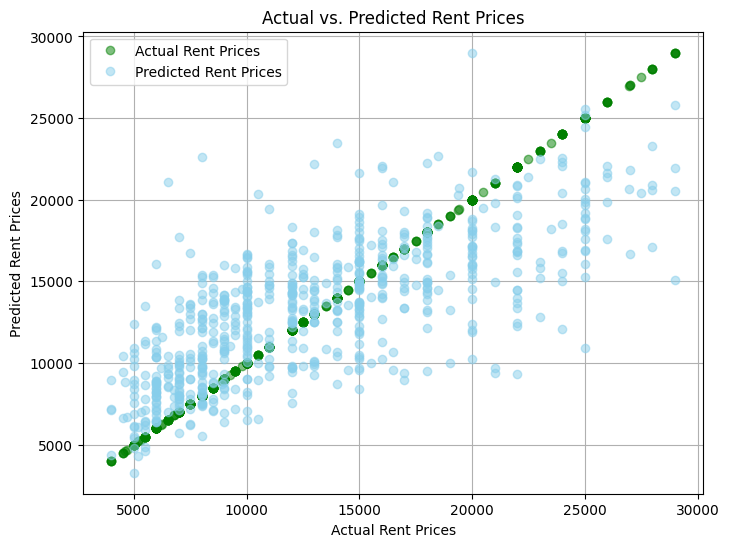

In [2541]:
plt.figure(figsize=(8,6))
plt.plot(y_test, y_test, 'o', alpha=0.5, color='green', label='Actual Rent Prices')
plt.plot(y_test, y_preds, 'o', alpha=0.5, color='skyblue', label='Predicted Rent Prices')

plt.title("Actual vs. Predicted Rent Prices")
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")

plt.legend()
plt.grid(True)
plt.show()